[Data source](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)


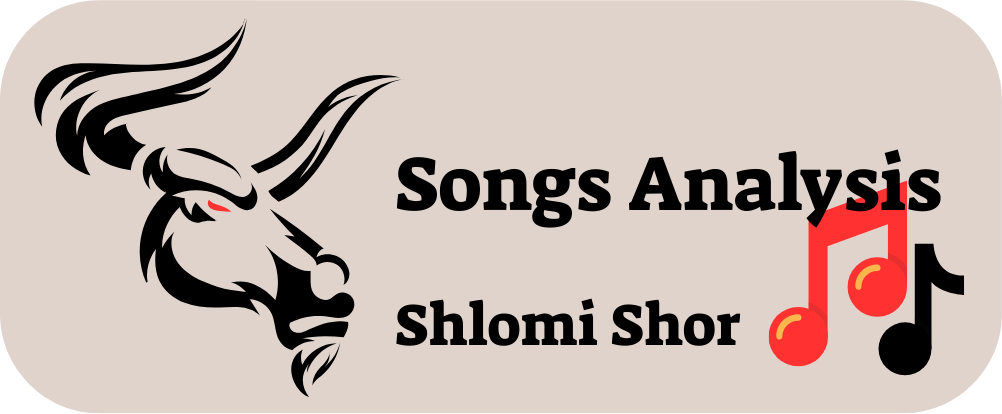

# **Loading the database -**

In [ ]:
!pip install adjustText # ספרייה שמאפשרת עבודה על גרפים

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
from google.colab import files

upladed = files.upload()

Saving songsdatabase-2023.xlsx to songsdatabase-2023.xlsx


In [ ]:
df = pd.read_excel("songsdatabase-2023.xlsx")

In [ ]:
df = pd.read_excel("songsdatabase-2023.xlsx")

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


**Description for every column**

In [ ]:
print(", ".join(df.columns))

track_name, artist(s)_name, artist_count, released_year, released_month, released_day, in_spotify_playlists, in_spotify_charts, streams, in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts, in_shazam_charts, bpm, key, mode, danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_%


1. track_name - Indicates the full title of the song, including details like collaborations.
2. artist(s)_name - Indicates the names of the artists who performed the song (one or more).
3. artist_count - Indicates the number of artists featured in the song.
4. released_year - Indicates the year the song was released.
5. released_month - Indicates the month the song was released.
6. released_day - Indicates the day of the month the song was released.
7. in_spotify_playlists - Indicates the number of Spotify playlists the song appears in.
8. in_spotify_charts - Indicates the number of times the song appeared in Spotify charts.
9. streams - Indicates the total number of streams for the song.
10. in_apple_playlists - Indicates the number of Apple Music playlists the song appears in.
11. bpm - Indicates the tempo of the song in beats per minute (BPM).
12. key - Indicates the musical key of the song (e.g., A, B, F).
13. mode - Indicates whether the song is in a major (happy) or minor (sad) mode.
14. danceability_% - Indicates, in percentage, how suitable the song is for dancing.
15. valence_% - Indicates, in percentage, the mood of the song (cheerful or melancholic).
16. energy_% - Indicates, in percentage, the energy level of the song.
17. acousticness_% - Indicates, in percentage, how acoustic the song is.
18. instrumentalness_% - Indicates, in percentage, how instrumental (without vocals) the song is.
19. liveness_% - Indicates, in percentage, the "liveliness" of the song (e.g., a live performance).
20. speechiness_% - Indicates, in percentage, how much speech is present in the song (e.g., rap).

# **Database Analysis**

In [ ]:
print(df.dtypes)

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                  object
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object


streams - אינו יכול להיות object

In [ ]:
# כמות השירים בדאטה בייס

df["track_name"].count()

953

In [ ]:
# מספר השנים שבהם יצאו שירים מתוך הדאטה בייס

unique_years = df["released_year"].nunique()
print(f'Number of Years: {unique_years}')

min_year = df['released_year'].min()
max_year = df['released_year'].max()
print(f'Min Year: {min_year}')
print(f'Max Year: {max_year}')


Number of Years: 50
Min Year: 1930
Max Year: 2023


In [ ]:
# פילוח של מספר האמנים המשתתפים בכל שיר

artists_per_song = df["artist_count"].value_counts()
print(f'Number of Artists: {artists_per_song}')

Number of Artists: artist_count
1    587
2    254
3     85
4     15
5      5
6      3
8      2
7      2
Name: count, dtype: int64


In [ ]:
# בדיקת כפילויות

duplicate_rows = df[df.duplicated(subset=['track_name', 'artist(s)_name'])]
print(f"Number of duplicate rows (by track_name and artist): {len(duplicate_rows)}")

Number of duplicate rows (by track_name and artist): 4


In [ ]:
duplicate_rows_minimal = duplicate_rows[['track_name', 'artist(s)_name']]
print(duplicate_rows_minimal)

           track_name artist(s)_name
482  SPIT IN MY FACE!       ThxSoMch
616    Take My Breath     The Weeknd
764   About Damn Time          Lizzo
873              SNAP      Rosa Linn


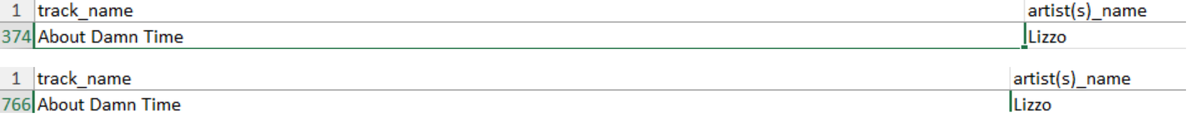

In [ ]:
# סך השירים לאחר מחיקת הכפילויות

df_unique = df.drop_duplicates(subset=['track_name', 'artist(s)_name'], keep='first')
print(f"Number of rows (songs) after removing duplicates: {len(df_unique)}")

Number of rows (songs) after removing duplicates: 949


In [ ]:
df_unique["mode"].value_counts()

,count
mode,
Major,547
Minor,402


**Singers split**

In [ ]:
df_unique['artist_list'] = df_unique['artist(s)_name'].str.split(', ')

df_exploded = df_unique.explode('artist_list')

artist_counts = df_exploded['artist_list'].value_counts()
print(artist_counts)

artist_list
Bad Bunny         40
Taylor Swift      38
The Weeknd        36
Kendrick Lamar    23
SZA               23
                  ..
La Joaqui          1
Steve Aoki         1
FIFA Sound         1
Beach House        1
Selena Gomez       1
Name: count, Length: 699, dtype: int64


<ipython-input-19-e6232619d260>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['artist_list'] = df_unique['artist(s)_name'].str.split(', ')


In [ ]:
artist_counts_df = df_exploded['artist_list'].value_counts().reset_index()
artist_counts_df.columns = ['Artist', 'Count']
artist_counts_df.to_excel("artist_list.xlsx", index=False)

In [ ]:
# files.download("artist_list.xlsx")

**Manual mapping required**

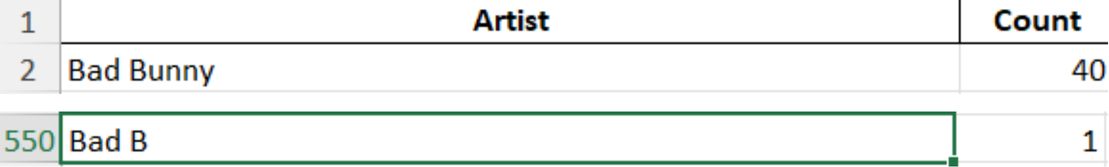

In [ ]:
df_exploded["artist_list"] = df_exploded["artist_list"].str.lower().str.strip()
df_exploded["artist_list"].value_counts()

,count
artist_list,
bad bunny,40
taylor swift,38
the weeknd,36
kendrick lamar,23
sza,23
...,...
la joaqui,1
steve aoki,1
fifa sound,1


In [ ]:
mapping = {
    "bad bunny": "bad bunny",
    "bad b": "bad bunny",
    "badbunny": "bad bunny",
    "b. bunny": "bad bunny",
    "taylor swift": "taylor swift",
    "t. swift": "taylor swift",
    "taylor": "taylor swift",
    "tay swift": "taylor swift",
    "the weeknd": "the weeknd",
    "weeknd": "the weeknd",
    "theweeknd": "the weeknd",
    "drake": "drake",
    "d. drake": "drake",
    "harry styles": "harry styles",
    "h. styles": "harry styles",
    "styles": "harry styles",
    "sza": "sza",
    "s.z.a.": "sza",
    "s z a": "sza",
}

df_exploded["unified_artist"] = df_exploded["artist_list"].apply(
    lambda x: mapping[x] if x in mapping else x
)

artist_counts = df_exploded["unified_artist"].value_counts()
print(artist_counts)

unified_artist
bad bunny         41
taylor swift      38
the weeknd        36
sza               23
kendrick lamar    23
                  ..
conan gray         1
la joaqui          1
steve aoki         1
fifa sound         1
selena gomez       1
Name: count, Length: 698, dtype: int64


In [ ]:
# סופר את מספר האומנים בדאטה

unique_artists_count = df_exploded["unified_artist"].nunique() # סופר את מספר האומנים בעמודה באופן ייחודי
print(f"Number of unique artists: {unique_artists_count}")

Number of unique artists: 698


In [ ]:
df_exploded.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist_list,unified_artist
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,Major,80,89,83,31,0,8,4,latto,latto
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,Major,80,89,83,31,0,8,4,jung kook,jung kook
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,Major,71,61,74,7,0,10,4,myke towers,myke towers
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,Major,51,32,53,17,0,31,6,olivia rodrigo,olivia rodrigo
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,Major,55,58,72,11,0,11,15,taylor swift,taylor swift


In [ ]:
# השנים שיש בהם שירים

year_counts = df_unique['released_year'].value_counts().sort_index()
print(year_counts)

released_year
1930      1
1942      1
1946      1
1950      1
1952      1
1957      2
1958      3
1959      2
1963      3
1968      1
1970      2
1971      1
1973      1
1975      2
1979      1
1982      2
1983      1
1984      4
1985      2
1986      2
1987      1
1991      2
1992      1
1994      1
1995      2
1996      1
1997      1
1998      1
1999      5
2000      4
2002      6
2003      2
2004      4
2005      1
2007      1
2008      2
2010      7
2011     10
2012     10
2013     13
2014     13
2015     11
2016     18
2017     23
2018     10
2019     36
2020     37
2021    118
2022    399
2023    175
Name: count, dtype: int64


In [ ]:
bins = list(range(1930, 2040, 10))
labels = [f"{decade}s" for decade in bins[:-1]]

df_unique['decade'] = pd.cut(df_unique['released_year'], bins=bins, labels=labels, right=False)
decade_counts = df_unique['decade'].value_counts().sort_index() # ספירת כמות השירים בכל עשור

print(decade_counts)

<ipython-input-27-d374c6416e8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['decade'] = pd.cut(df_unique['released_year'], bins=bins, labels=labels, right=False)


decade
1930s      1
1940s      2
1950s      9
1960s      4
1970s      7
1980s     12
1990s     14
2000s     20
2010s    151
2020s    729
Name: count, dtype: int64


In [ ]:
stats = df_unique[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].describe()

print(stats)

       danceability_%   valence_%    energy_%  acousticness_%  \
count      949.000000  949.000000  949.000000      949.000000   
mean        66.951528   51.401475   64.266596       27.138040   
std         14.644010   23.519855   16.577702       26.020296   
min         23.000000    4.000000    9.000000        0.000000   
25%         57.000000   32.000000   53.000000        6.000000   
50%         69.000000   51.000000   66.000000       18.000000   
75%         78.000000   70.000000   77.000000       43.000000   
max         96.000000   97.000000   97.000000       97.000000   

       instrumentalness_%  liveness_%  speechiness_%  
count          949.000000  949.000000     949.000000  
mean             1.566913   18.183351      10.146470  
std              8.405782   13.698921       9.930807  
min              0.000000    3.000000       2.000000  
25%              0.000000   10.000000       4.000000  
50%              0.000000   12.000000       6.000000  
75%              0.000000   2



1.   DANCEABILITY: Avg. Avg. 66.95% (Median: 69%)  → Most songs are easy to dance to, but a few less danceable songs lower the average
2. VALENCE:  Avg. 51.4% (Median: 51%) → Balance between happy and sad songs, with a symmetric distribution of emotional tone
3. ENERGY: Avg. 64.27% (Median: 66%) → Songs generally have medium-to-high energy, but quieter songs slightly reduce the average
4. LIVENESS: Avg. 18.18% (Median: 13%, Max: 97%) → Some songs were likely performed live




**We checked that all the data in the "streams" column is in an int variable.**

In [ ]:
print(df['streams'].dtypes)

object


In [ ]:
non_numeric_streams = df[~df['streams'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
print(non_numeric_streams)

                              track_name     artist(s)_name  artist_count  \
574  Love Grows (Where My Rosemary Goes)  Edison Lighthouse             1   

     released_year  released_month  released_day  in_spotify_playlists  \
574           1970               1             1                  2877   

     in_spotify_charts                                            streams  \
574                  0  BPM110KeyAModeMajorDanceability53Valence75Ener...   

     in_apple_playlists  ...  bpm  key   mode  danceability_%  valence_%  \
574                  16  ...  110    A  Major              53         75   

    energy_% acousticness_%  instrumentalness_%  liveness_%  speechiness_%  
574       69              7                   0          17              3  

[1 rows x 24 columns]


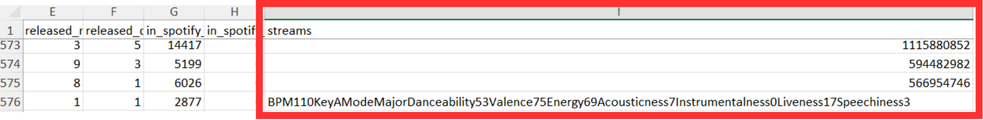

**We will change the number of plays to the correct number**

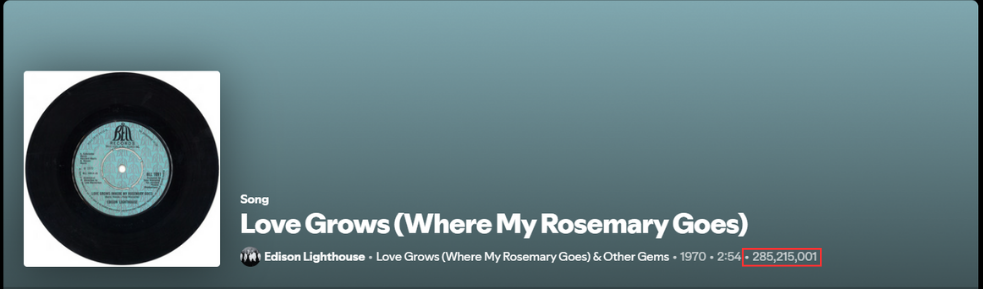

In [ ]:
df.loc[574, 'streams'] = 285215001
df_unique.loc[574, 'streams'] = 285215001
print(df.loc[574, 'streams'])

285215001


In [ ]:
# המרת עמודת streams למספרים

df["streams"] = pd.to_numeric(df["streams"], errors='coerce')
df_unique["streams"] = pd.to_numeric(df_unique["streams"], errors='coerce')

<ipython-input-32-276630dfa662>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique["streams"] = pd.to_numeric(df_unique["streams"], errors='coerce')


In [ ]:
print(df.dtypes)
print("")
print(df_unique.dtypes)

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                   int64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

track_name                object
artist(s)_name            object
artist_count               int64
released_year              int64
released_month             int64
released_day               int64
in_spotify_playlist

# **First insight - Which artist is most streamed on each platform?**

In [ ]:
platform_columns = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']

platform_artist_counts = {}

for platform in platform_columns:
    platform_artist_counts[platform] = df_exploded.groupby('unified_artist')[platform].sum().sort_values(ascending=False) # מחשב עבור כל אומן כמה פעמים מופיע בכל פלטפורמה ואוגר את זה במילון

df_exploded['total_appearances'] = df_exploded[platform_columns].sum(axis=1) #  עמודה חדשה שיש בה חיבור של כל הפלטפורמות

for platform, counts in platform_artist_counts.items():
    print(f"Top artists on {platform}:")
    print(counts.head(), "\n")


Top artists on in_spotify_playlists:
unified_artist
the weeknd      226687
eminem          155091
bad bunny       143697
ed sheeran      142877
taylor swift    137766
Name: in_spotify_playlists, dtype: int64 

Top artists on in_apple_playlists:
unified_artist
the weeknd      2849
dua lipa        2118
bad bunny       2087
taylor swift    1899
ed sheeran      1857
Name: in_apple_playlists, dtype: int64 

Top artists on in_deezer_playlists:
unified_artist
eminem         24524
ed sheeran     17833
coldplay       15419
dr. dre        15408
linkin park    14149
Name: in_deezer_playlists, dtype: int64 



**Graphs for each platform**

<ipython-input-35-5e9247591433>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  A = sns.barplot(x='unified_artist', y='in_spotify_playlists', data = top_spotify_artists, palette='viridis')
<ipython-input-35-5e9247591433>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  A.set_xticklabels(A.get_xticklabels(), rotation=90)


[Text(0, 0, 'the weeknd'),
 Text(1, 0, 'eminem'),
 Text(2, 0, 'bad bunny'),
 Text(3, 0, 'ed sheeran'),
 Text(4, 0, 'taylor swift'),
 Text(5, 0, 'dua lipa'),
 Text(6, 0, 'kendrick lamar'),
 Text(7, 0, 'harry styles'),
 Text(8, 0, 'coldplay'),
 Text(9, 0, 'dr. dre')]

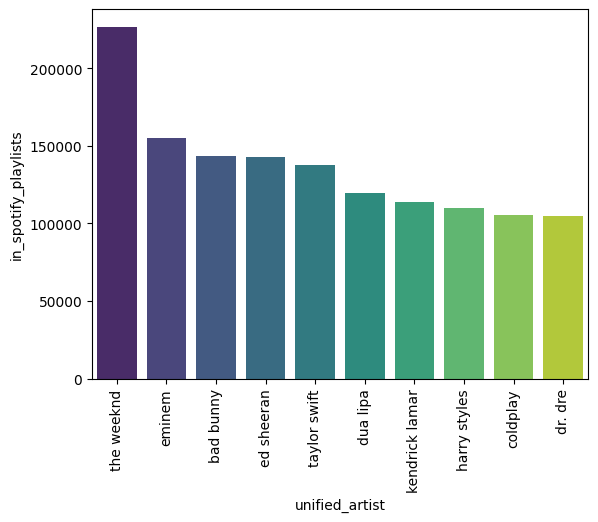

In [ ]:
# גרף עבור ספוטיפיי

top_spotify_artists = df_exploded.groupby('unified_artist')['in_spotify_playlists'].sum().sort_values(ascending=False).head(10).reset_index()
A = sns.barplot(x='unified_artist', y='in_spotify_playlists', data = top_spotify_artists, palette='viridis')
A.set_xticklabels(A.get_xticklabels(), rotation=90)

<ipython-input-36-8dd30e258a87>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  B = sns.barplot(x='unified_artist', y='in_apple_playlists', data = top_apple_artists, palette='viridis')
<ipython-input-36-8dd30e258a87>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  B.set_xticklabels(B.get_xticklabels(), rotation=90)


[Text(0, 0, 'the weeknd'),
 Text(1, 0, 'dua lipa'),
 Text(2, 0, 'bad bunny'),
 Text(3, 0, 'taylor swift'),
 Text(4, 0, 'ed sheeran'),
 Text(5, 0, 'harry styles'),
 Text(6, 0, 'drake'),
 Text(7, 0, 'justin bieber'),
 Text(8, 0, 'calvin harris'),
 Text(9, 0, 'doja cat')]

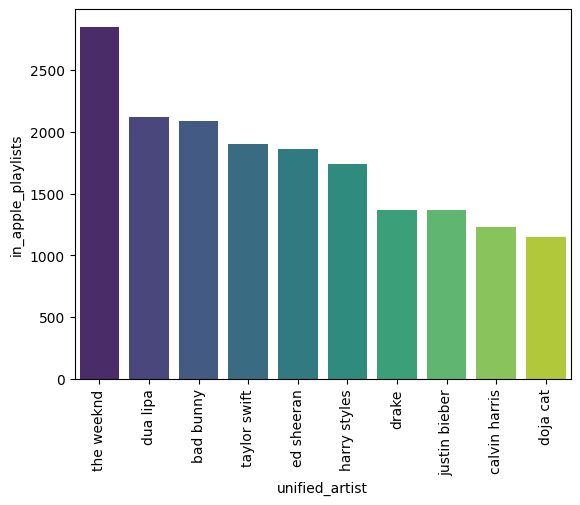

In [ ]:
# גרף עבור אפל

top_apple_artists = platform_artist_counts['in_apple_playlists'].head(10).reset_index()
B = sns.barplot(x='unified_artist', y='in_apple_playlists', data = top_apple_artists, palette='viridis')
B.set_xticklabels(B.get_xticklabels(), rotation=90)

<ipython-input-37-a83962aeae48>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  C = sns.barplot(x='unified_artist', y='in_deezer_playlists', data = top_deezer_artists, palette='viridis')
<ipython-input-37-a83962aeae48>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  C.set_xticklabels(C.get_xticklabels(), rotation=90)


[Text(0, 0, 'eminem'),
 Text(1, 0, 'ed sheeran'),
 Text(2, 0, 'coldplay'),
 Text(3, 0, 'dr. dre'),
 Text(4, 0, 'linkin park'),
 Text(5, 0, 'nirvana'),
 Text(6, 0, 'the weeknd'),
 Text(7, 0, 'snoop dogg'),
 Text(8, 0, 'daft punk'),
 Text(9, 0, 'adele')]

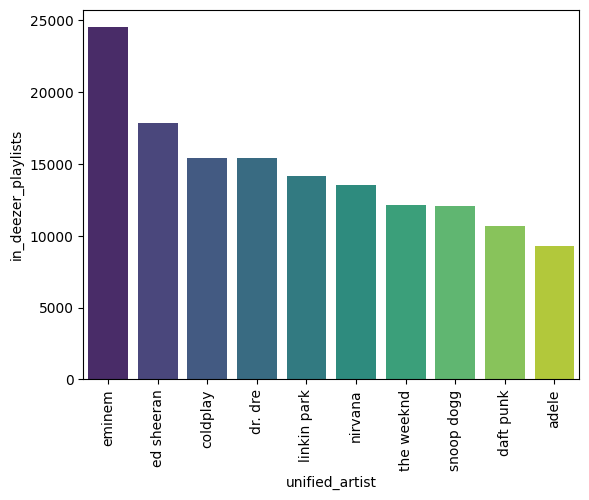

In [ ]:
# גרף עבור דיזר

top_deezer_artists = df_exploded.groupby('unified_artist')['in_deezer_playlists'].sum().sort_values(ascending=False).head(10).reset_index()
C = sns.barplot(x='unified_artist', y='in_deezer_playlists', data = top_deezer_artists, palette='viridis')
C.set_xticklabels(C.get_xticklabels(), rotation=90)

<ipython-input-38-9b7e8c1492d2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  D = sns.barplot(x='unified_artist', y='total_appearances', data = total_appearances, palette='viridis')
<ipython-input-38-9b7e8c1492d2>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  D.set_xticklabels(D.get_xticklabels(), rotation=90)


[Text(0, 0, 'the weeknd'),
 Text(1, 0, 'eminem'),
 Text(2, 0, 'ed sheeran'),
 Text(3, 0, 'bad bunny'),
 Text(4, 0, 'taylor swift'),
 Text(5, 0, 'dua lipa'),
 Text(6, 0, 'coldplay'),
 Text(7, 0, 'dr. dre'),
 Text(8, 0, 'kendrick lamar'),
 Text(9, 0, 'harry styles')]

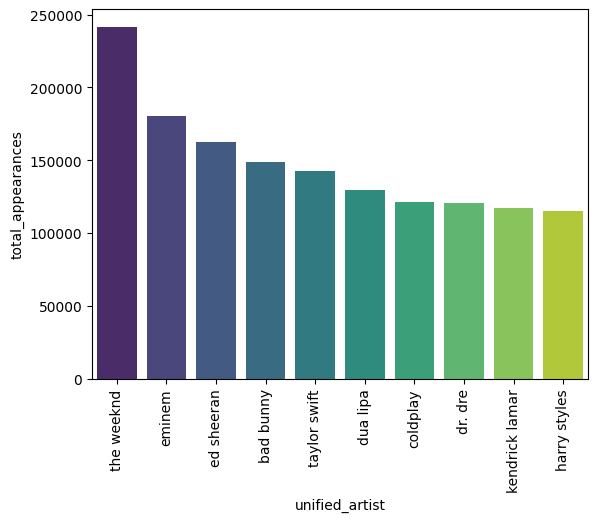

In [ ]:
# האומן הכי מושמע בכל הפלטפורמות

total_appearances = df_exploded.groupby('unified_artist')['total_appearances'].sum().sort_values(ascending=False).head(10).reset_index()
D = sns.barplot(x='unified_artist', y='total_appearances', data = total_appearances, palette='viridis')
D.set_xticklabels(D.get_xticklabels(), rotation=90)



1. The Weeknd is undoubtedly the most dominant artist, leading almost every platform with a high number of appearances.
2. On the other hand, Deezer shows a clear preference for classic and "Old School" music, featuring artists and bands like DR Dre and Snoop dogg, reflecting a more nostalgic and diverse audience.
3. Meanwhile, Spotify and Apple Music focus more on mainstream artists like Taylor Swift, Dua Lipa, and Bad Bunny, catering to a broader and more current audience.



# **Second insight - Seasonal Trends and Song Performance: Mood, Energy, and Features**

In [ ]:
season_mapping = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Fall': [9, 10, 11]
}

In [ ]:
def map_month_to_season(month):
    for season, months in season_mapping.items():
        if month in months:
            return season
    return None

In [ ]:
df_unique['season'] = df_unique['released_month'].apply(map_month_to_season)

<ipython-input-41-ed8b4dba46ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['season'] = df_unique['released_month'].apply(map_month_to_season)


In [ ]:
df_unique.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist_list,decade,season
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,80,89,83,31,0,8,4,"[Latto, Jung Kook]",2020s,Summer
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,71,61,74,7,0,10,4,[Myke Towers],2020s,Spring
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,51,32,53,17,0,31,6,[Olivia Rodrigo],2020s,Summer
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,55,58,72,11,0,11,15,[Taylor Swift],2010s,Summer
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,65,23,80,14,63,11,6,[Bad Bunny],2020s,Spring


<ipython-input-43-d586c13b410d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_unique, x='mode', y='streams', palette={'Major': 'green', 'Minor': 'red'})


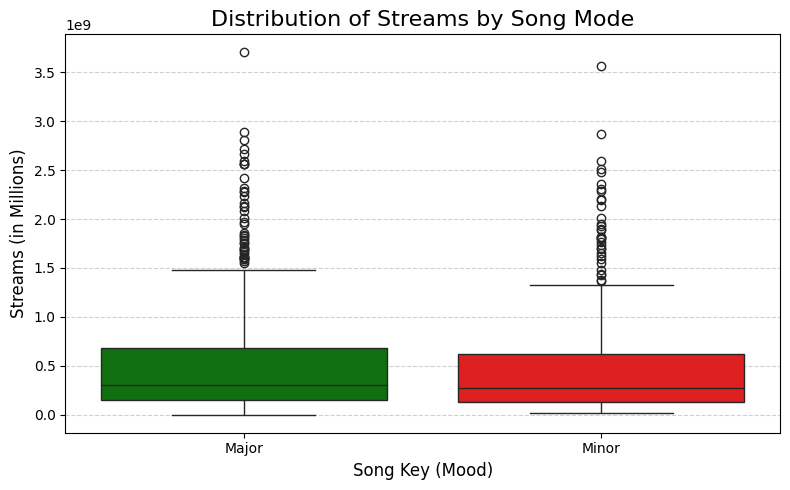

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_unique, x='mode', y='streams', palette={'Major': 'green', 'Minor': 'red'})
plt.title("Distribution of Streams by Song Mode", fontsize=16)
plt.xlabel("Song Key (Mood)", fontsize=12)
plt.ylabel("Streams (in Millions)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# כמות שירים עבור כל עונה

songs_per_season_counts = df_unique["season"].value_counts()
print(songs_per_season_counts)

season
Spring    278
Winter    270
Fall      208
Summer    193
Name: count, dtype: int64


In [ ]:
features = [ 'danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']

In [ ]:
season_features = df_unique.groupby('season')[features].mean()

Text(0.5, 1.0, 'Seasonal Comparison of Song Features')

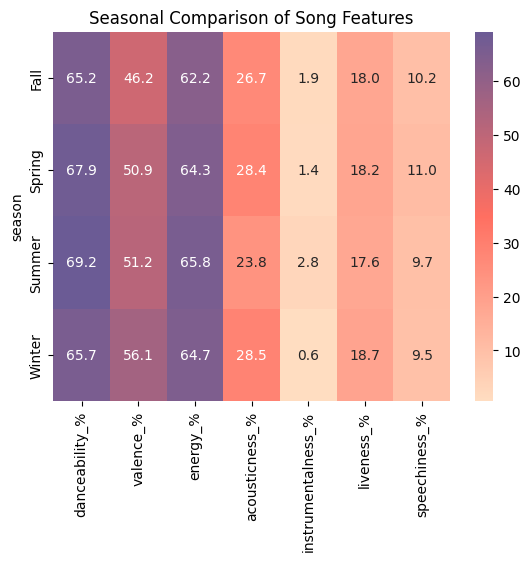

In [ ]:
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#FFDDC1", "#FF6F61", "#6B5B95"])
sns.heatmap(season_features, annot=True, fmt=".1f", cmap=custom_cmap, cbar=True)
plt.title("Seasonal Comparison of Song Features")

In [ ]:
season_mood_ct = pd.crosstab(df_unique['season'], df_unique['mode'], normalize='index') * 100 # בונה טבלת ציר שסופרת כמה שירים מכל מצב רוח קיימים בכל עונה

<Axes: xlabel='season'>

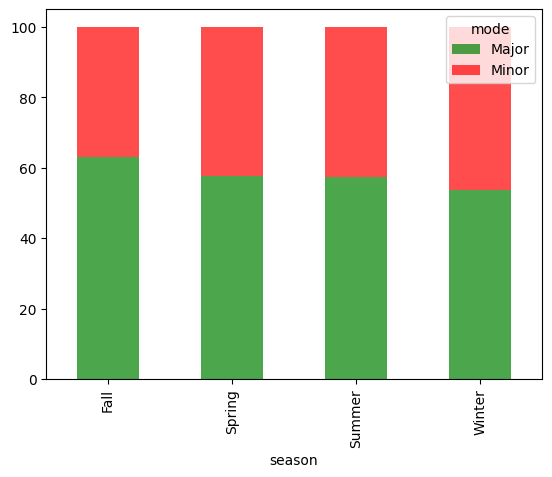

In [ ]:
season_mood_ct.plot(kind='bar', stacked=True, color=['green', 'red'], alpha=0.7)

**1. Song Performance by Mood (Major vs. Minor):**



  * Median Streams: Major and Minor songs have similar average performance, indicating no clear advantage for either mood.
  * Outliers: Minor (sadder) songs have a comparable number of high-performing outliers to Major (happier) songs, proving that both can achieve success

**2. Seasonal Trends in Song Features:**
  * Summer: Songs have the highest energy (66.8%) and danceability (71%), indicating a preference for upbeat and synthetic tracks
  * Fall: The highest speechiness (11.3%) suggests a tendency for lyrical and storytelling songs, contrasting with summer's lower values (9.9%)
  * Winter: Acousticness peaks at 27%, showing a preference for quiet, intimate songs during this season


**While Major and Minor songs perform equally well, seasonal trends reveal a clear preference for upbeat and danceable songs in summer, and quieter, acoustic tracks in winter**

# **Third insight - Quality vs. Quantity: Artists' Success Strategies**

In [ ]:
artist_data = df_exploded.groupby('unified_artist').agg(total_songs=('track_name', 'count'), total_streams=('streams', 'sum')).reset_index() #חישוב של כמות שירים וסך השמעות עבור לכ אמן
artist_data['total_streams'] = pd.to_numeric(artist_data['total_streams'], errors='coerce') # המרת הערכים בעמודת סך ההשמעות לערך מספרי, אם יש ערכים שאינם ניתנים להמרה הם יולפו בNull
artist_data['total_streams_millions'] = artist_data['total_streams'] / 1_000_000 # חלוקת מספר ההשמעות במיליון
artist_data = artist_data[artist_data['total_songs'] > 2].sort_values(by='total_streams', ascending=False) # סינון לאומנים עם מעל שני שירים לפחות

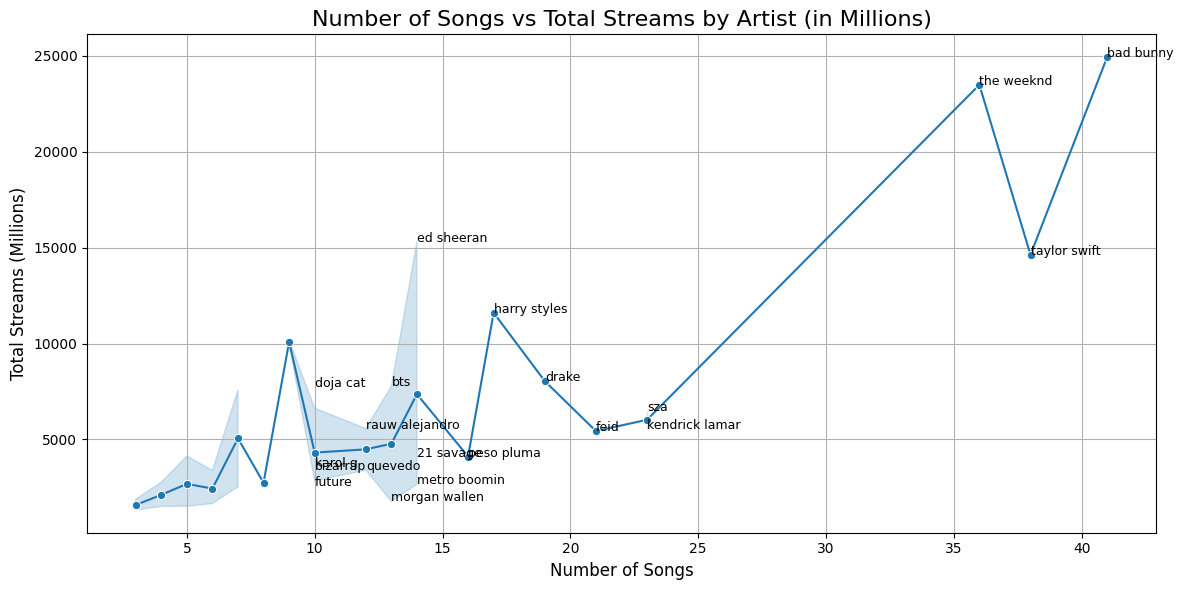

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=artist_data, x='total_songs', y='total_streams_millions', marker='o')
plt.title("Number of Songs vs Total Streams by Artist (in Millions)", fontsize=16)
plt.xlabel("Number of Songs", fontsize=12)
plt.ylabel("Total Streams (Millions)", fontsize=12)
plt.grid(True)

# תוויות על הגרף
for i, row in artist_data.iterrows():
    if row['total_songs'] > 9:  # הצגת תוויות לאמנים עם יותר מ-9 שירים
        plt.text(row['total_songs'], row['total_streams_millions'], row['unified_artist'], fontsize=9)

plt.tight_layout()
plt.show()

<ipython-input-52-94b77e3994b9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_contributors, x='unified_artist', y='contribution', palette='magma')


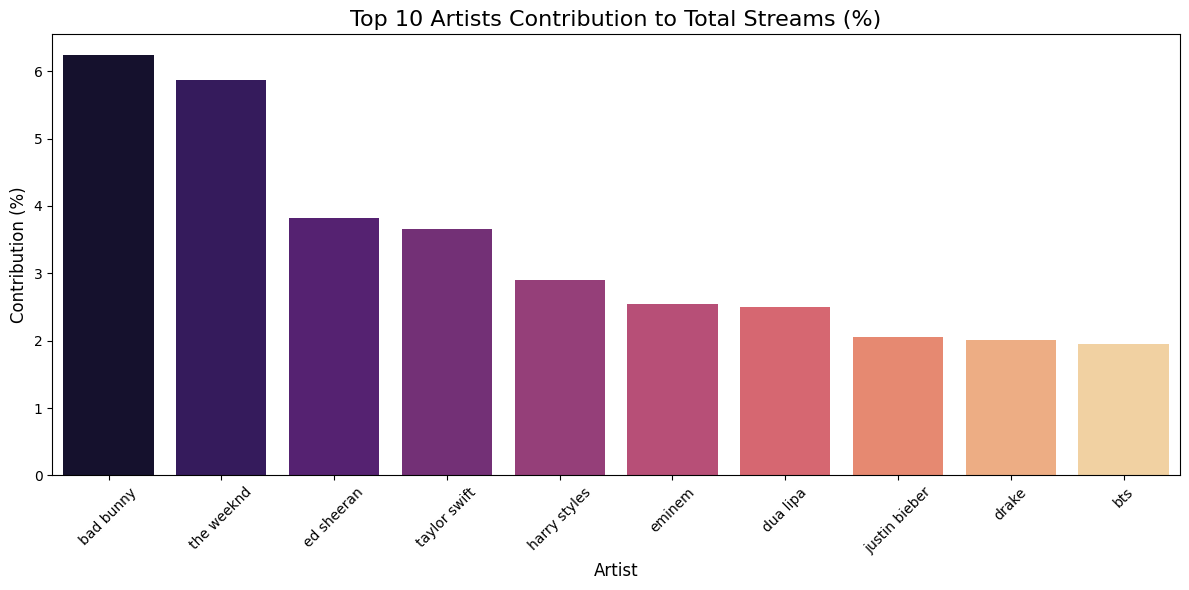

In [ ]:
artist_data['contribution'] = (artist_data['total_streams'] / artist_data['total_streams'].sum()) * 100 # חישוב אחוז ההשמעות מסך כל ההשמעות
top_contributors = artist_data.sort_values(by='contribution', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_contributors, x='unified_artist', y='contribution', palette='magma')
plt.title("Top 10 Artists Contribution to Total Streams (%)", fontsize=16)
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Contribution (%)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. Bad Bunny and The Weeknd - Lead with both high volume of songs and high
streams, showcasing the advantage of combining quantity with quality
2. ED SHEERAN - Despite releasing a smaller number of songs, Ed Sheeran achieves massive streams, proving that a focus on quality can also lead to significant success
3. There isn’t always a positive correlation between the number of songs and total streams
4. Both strategies – quantity (many songs) and quality (fewer hits) – can lead to success depending on the artist's style and audience

# **Fourth insight - Top 10 Most Played Songs, A Look At Popularity and Mood**

In [ ]:
top_song_index = df_unique['streams'].idxmax()  # קבלת האינדקס של השורה עם המספר המקסימלי
top_song_name = df_unique.loc[top_song_index, 'track_name']
top_song_streams = df_unique.loc[top_song_index, 'streams']
print(f"The most played song is: {top_song_name} with {top_song_streams} streams")

The most played song is: Blinding Lights with 3703895074 streams


<ipython-input-54-f6ce4db76486>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  E = sns.barplot(data=top_songs, x='streams', y='track_name', palette="viridis")
<ipython-input-54-f6ce4db76486>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  E.set_xticklabels(E.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'The ten most played songs')

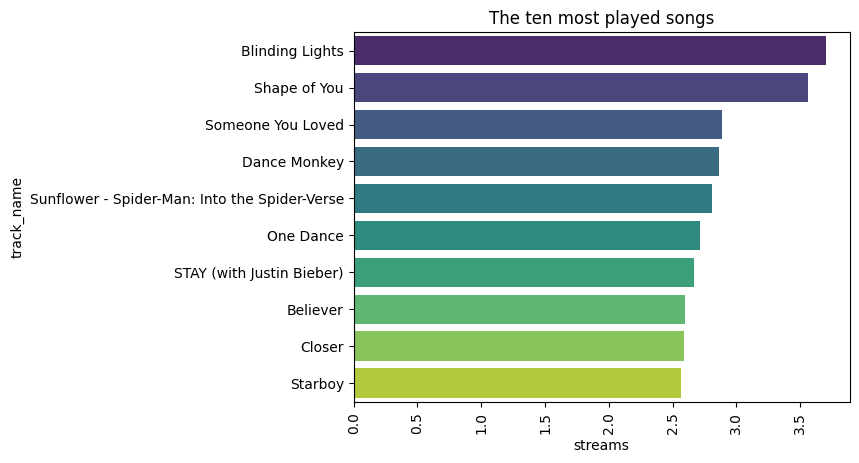

In [ ]:
top_songs = df_unique[['track_name', 'artist(s)_name', 'streams', 'mode']].sort_values(by='streams', ascending=False).head(10)
E = sns.barplot(data=top_songs, x='streams', y='track_name', palette="viridis")
E.set_xticklabels(E.get_xticklabels(), rotation=90)

plt.title("The ten most played songs", fontsize=12)

<ipython-input-55-68ab29ae91e8>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  F.set_xticklabels(E.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'The Ten Most Played Songs and Their Mood (Major/Minor)')

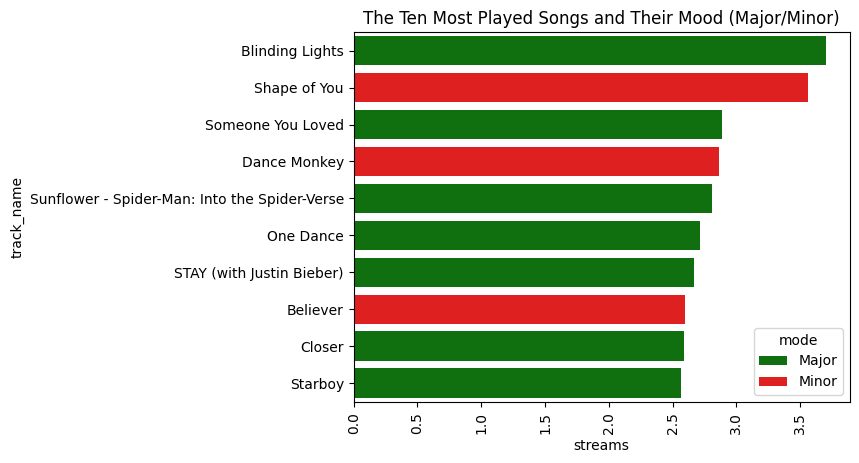

In [ ]:
palette = {'Major': 'green', 'Minor': 'red'}
F = sns.barplot(data=top_songs, x='streams', y='track_name', hue='mode', palette=palette, dodge=False)
F.set_xticklabels(E.get_xticklabels(), rotation=90)
plt.title("The Ten Most Played Songs and Their Mood (Major/Minor)", fontsize=12)

In [ ]:
major_songs = df_unique[df_unique['mode'] == 'Major']['streams']
minor_songs = df_unique[df_unique['mode'] == 'Minor']['streams']

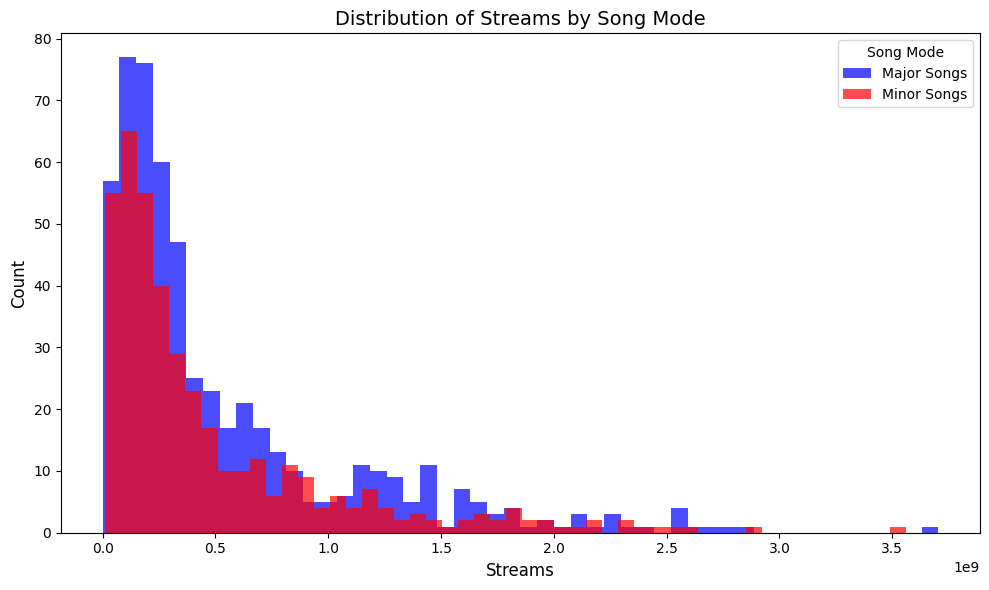

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(major_songs, bins=50, alpha=0.7, label='Major Songs', color='blue')
plt.hist(minor_songs, bins=50, alpha=0.7, label='Minor Songs', color='red')

plt.title("Distribution of Streams by Song Mode", fontsize=14)
plt.xlabel("Streams", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Song Mode")
plt.tight_layout()
plt.show()

1. There was an issue with the number of streams for the song "Love Grows" in the database, we have updated the value for the song's playlist on the Spotify platform
2. “Blinding Lights" by The Weeknd is The most played song with 3.7 billion streams, highlighting its massive global popularity.
3. Most of the Top 10 songs are in Major mode (green), representing happier, upbeat, and energetic music.

# **Fifth insight - Impact of Artist Count on Song Popularity**

In [ ]:
# כמות האומנים המשתתפים בכל שיר

df["artist_count"].value_counts()

,count
artist_count,
1,587
2,254
3,85
4,15
5,5
6,3
8,2
7,2


In [ ]:
bins = [0, 100000, 5000000, 10000000, 50000000, 150000000, 1000000000, 1500000000]
labels = ["<100K", "100K-5M", "5M-10M", "10M-50M", "50M-150M", "150M-1B", ">1B"]
df_unique['streams_category'] = pd.cut(df_unique['streams'], bins=bins, labels=labels)

<ipython-input-59-c063b3385474>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['streams_category'] = pd.cut(df_unique['streams'], bins=bins, labels=labels)


Text(0.5, 1.0, 'Distribution of Streams by Number of Artists')

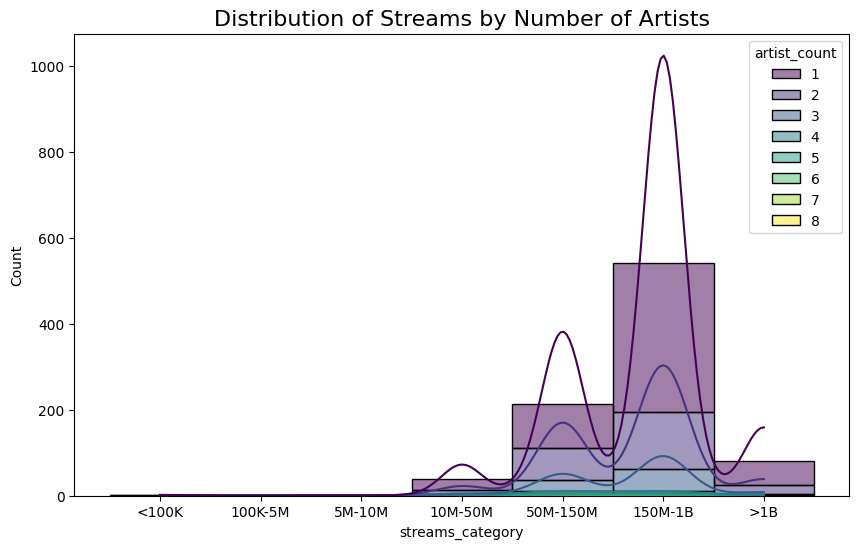

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_unique, x='streams_category', hue='artist_count', bins=30, kde=True, palette='viridis', multiple='stack')
plt.title("Distribution of Streams by Number of Artists", fontsize=16)

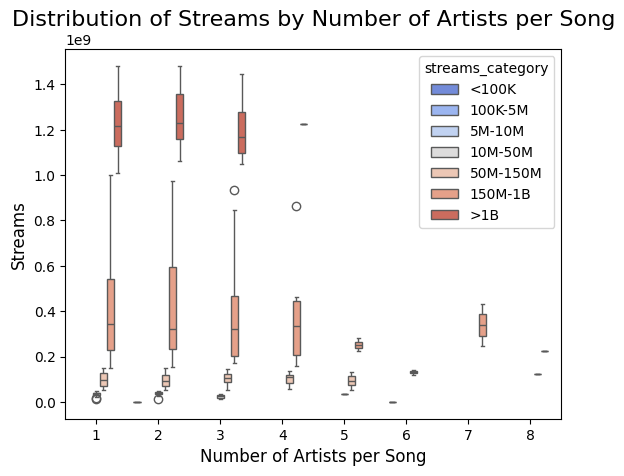

In [ ]:
sns.boxplot(data=df_unique, x='artist_count', y='streams', hue='streams_category', palette='coolwarm')
plt.title("Distribution of Streams by Number of Artists per Song", fontsize=16)
plt.xlabel("Number of Artists per Song", fontsize=12)
plt.ylabel("Streams", fontsize=12)
plt.show()

1. More artists don't always mean more streams - Most songs with over 1 billion streams feature one or two artists, while songs with 3 or more artists usually have fewer streams
2. Solo artists dominate streaming categories - Most songs in the "50M-150M" range are by solo artists, while songs with multiple artists tend to have fewer streams
3. Solo artists create the biggest hits - Songs with over 1 billion streams show the strength of solo artists, thanks to strong personal branding and dedicated fanbases.

**While collaborations can be popular, solo artists dominate the charts, achieving the biggest hits and highest stream counts, thanks to their strong personal branding and fan engagement**

# **Sixth insight - Interplay of Parameters**

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-60%", "60-70%", "70-80%", "80-90%", "90-100%"]

<ipython-input-63-b72d14a2d6fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['danceability_bins'] = pd.cut(df_unique['danceability_%'], bins=bins, labels=labels, right=False)
<ipython-input-63-b72d14a2d6fa>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_streams_by_bins = df_unique.groupby('danceability_bins')['streams'].mean().reset_index()
<ipython-input-63-b72d14a2d6fa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for t

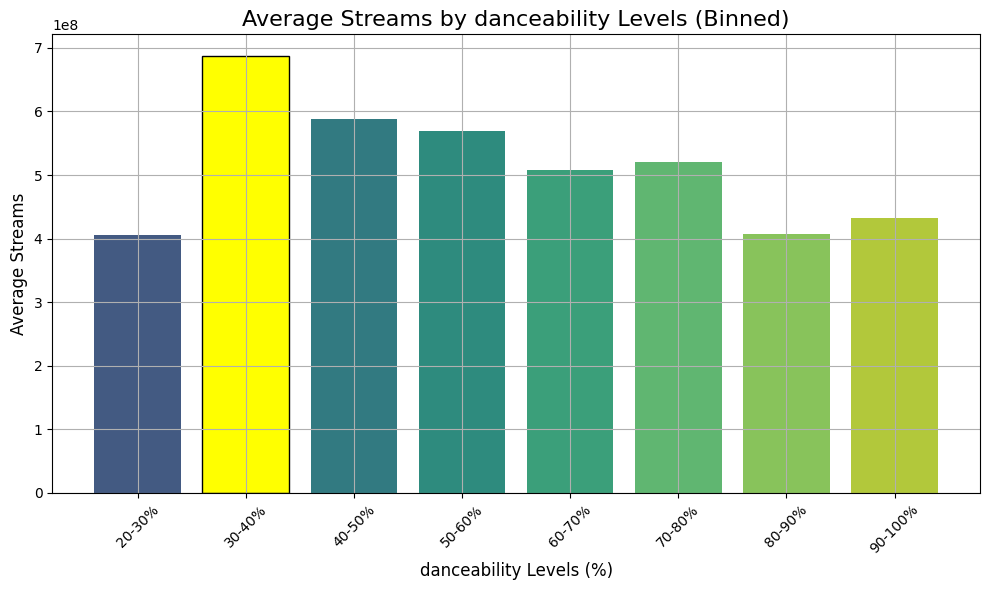

In [ ]:
# ממוצע ההשמעות לפי רמות של ריקודיות בשיר

df_unique['danceability_bins'] = pd.cut(df_unique['danceability_%'], bins=bins, labels=labels, right=False)
avg_streams_by_bins = df_unique.groupby('danceability_bins')['streams'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_streams_by_bins, x='danceability_bins', y='streams', palette='viridis')

max_bin = avg_streams_by_bins.loc[avg_streams_by_bins['streams'].idxmax()]
plt.bar(max_bin['danceability_bins'], max_bin['streams'], color='yellow', edgecolor='black', label='Top Category')

plt.title("Average Streams by danceability Levels (Binned)", fontsize=16)
plt.xlabel("danceability Levels (%)", fontsize=12)
plt.ylabel("Average Streams", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

<ipython-input-64-e4d9c1983f92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['energy_bins'] = pd.cut(df_unique['energy_%'], bins=bins, labels=labels, right=False)
<ipython-input-64-e4d9c1983f92>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_streams_by_bins = df_unique.groupby('energy_bins')['streams'].mean().reset_index()
<ipython-input-64-e4d9c1983f92>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

 

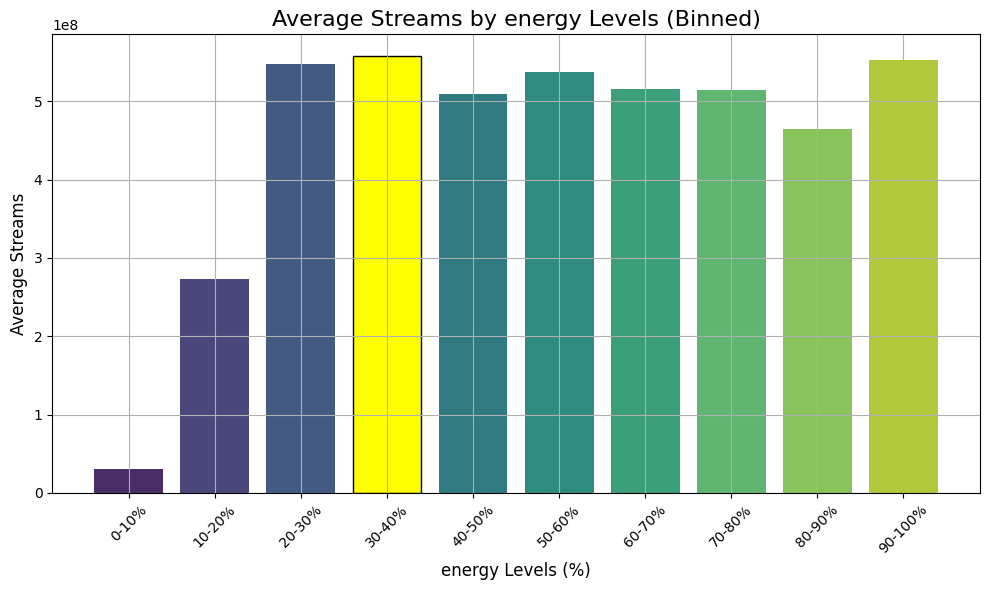

In [ ]:
# ממוצע השמעות לפי רמות של  אנרגיה בשיר

df_unique['energy_bins'] = pd.cut(df_unique['energy_%'], bins=bins, labels=labels, right=False)
avg_streams_by_bins = df_unique.groupby('energy_bins')['streams'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_streams_by_bins, x='energy_bins', y='streams', palette='viridis')

max_bin = avg_streams_by_bins.loc[avg_streams_by_bins['streams'].idxmax()]
plt.bar(max_bin['energy_bins'], max_bin['streams'], color='yellow', edgecolor='black', label='Top Category')

plt.title("Average Streams by energy Levels (Binned)", fontsize=16)
plt.xlabel("energy Levels (%)", fontsize=12)
plt.ylabel("Average Streams", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

**Proof via regression**

In [ ]:
from sklearn.linear_model import LinearRegression

X = df_unique[['energy_%', 'danceability_%']]
y = df_unique['streams']
model = LinearRegression()
model.fit(X, y)
print(f'Regression Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Regression Coefficients: [ -204245.29084613 -4030699.69006152]
Intercept: 796764481.0725533


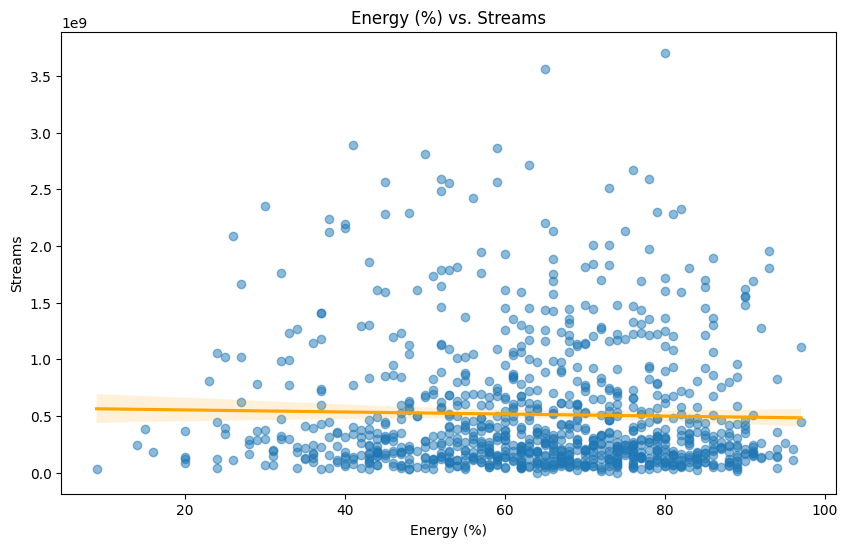

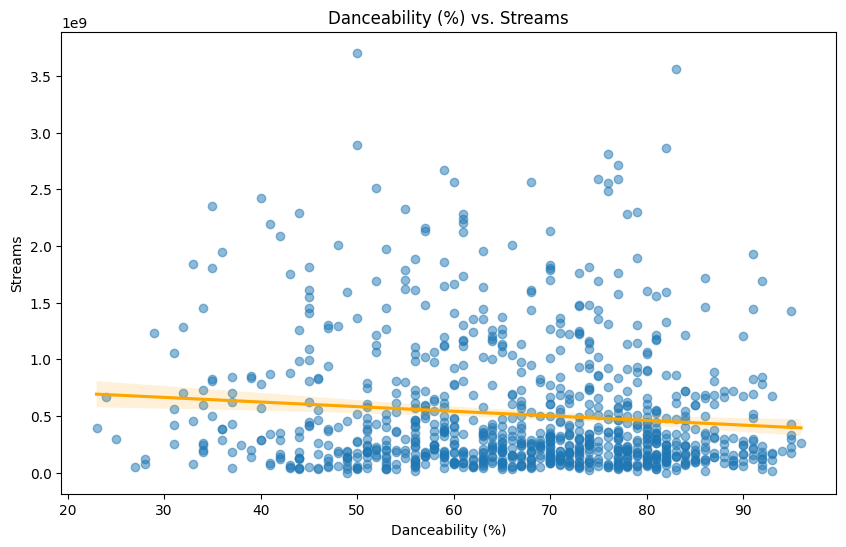

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_unique, x='energy_%', y='streams', scatter_kws={'alpha':0.5}, line_kws={"color": "orange"})
plt.title('Energy (%) vs. Streams')
plt.xlabel('Energy (%)')
plt.ylabel('Streams')
plt.show()

# גרף 2: Danceability מול Streams
plt.figure(figsize=(10, 6))
sns.regplot(data=df_unique, x='danceability_%', y='streams', scatter_kws={'alpha':0.5}, line_kws={"color": "orange"})
plt.title('Danceability (%) vs. Streams')
plt.xlabel('Danceability (%)')
plt.ylabel('Streams')
plt.show()

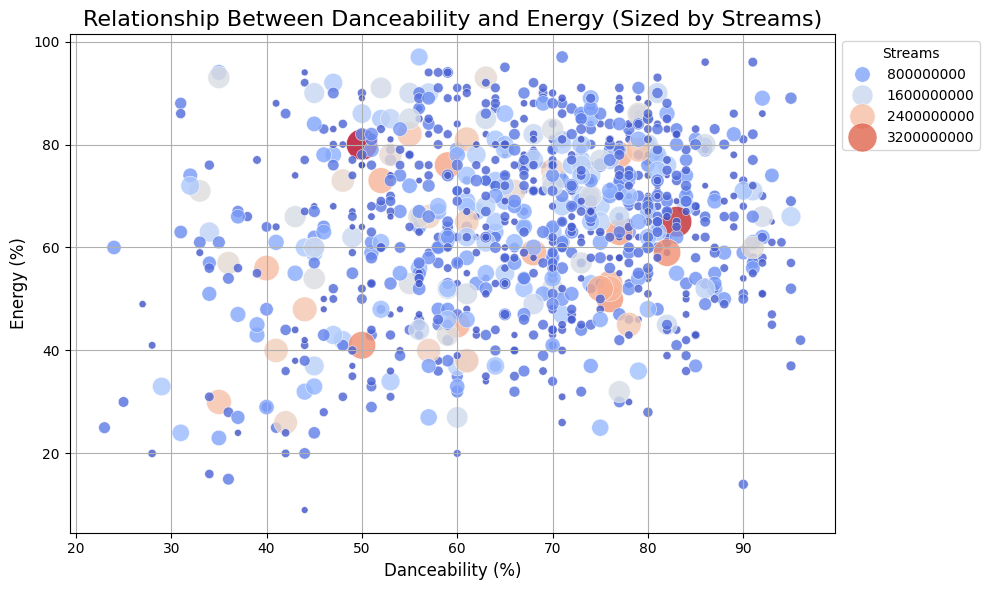

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_unique,
    x='danceability_%',
    y='energy_%',
    size='streams',
    sizes=(20, 500),
    hue='streams',  # הצגת גוון צבע לפי streams
    palette='coolwarm',
    alpha=0.8
)

plt.title("Relationship Between Danceability and Energy (Sized by Streams)", fontsize=16)
plt.xlabel("Danceability (%)", fontsize=12)
plt.ylabel("Energy (%)", fontsize=12)
plt.legend(title="Streams", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


1. It is impossible to view each parameter as an isolated and independent factor. While energy and danceability levels of 30-40% may appear optimal when examined individually, the combination of parameters reveals that songs with the highest number of streams actually tend to have higher energy and danceability levels. A song's success depends on the balance and interplay between parameters, not solely on focusing on the level of a single parameter.
2. The combination of parameters shows that the most successful songs do not necessarily follow the patterns that appear ideal when looking at individual parameters.

# ****Seventh  insight -The Breakout Year for Music After the COVID-19****

In [ ]:
top_year = df_exploded["released_year"].value_counts().idxmax() # מחזיר את השנה שמופיעה הכי הרבה פעמים בשנת יציאה של השיר
top_year_count = df_exploded["released_year"].value_counts().max()
print(f"Year with the most songs: {top_year} ({top_year_count} songs)")

In [ ]:
artist_year_data = df_exploded.groupby(['artist_list', 'released_year']).size().reset_index(name='song_count')
top_artists = artist_year_data.groupby('artist_list')['song_count'].sum()
filtered_data = artist_year_data[artist_year_data['artist_list'].isin(top_artists.nlargest(15).index)]

sns.lineplot(data=filtered_data, x='released_year', y='song_count', hue='artist_list', marker='o')
plt.title("Number of Songs Released Per Year by Artists", fontsize=16)

In [ ]:
filtered_data = artist_year_data[
    (artist_year_data['released_year'] >= 2014) & (artist_year_data['released_year'] <= 2024)
]

top_artists = filtered_data.groupby('artist_list')['song_count'].sum().nlargest(10).index
filtered_data = filtered_data[filtered_data['artist_list'].isin(top_artists)]

sns.lineplot(data=filtered_data, x='released_year', y='song_count', hue='artist_list', marker='o')

plt.title("Number of Songs Released Per Year by Artists In Last Deacade", fontsize=12)

he graph highlights the impact of COVID-19 on the music industry, showing a surge in creativity during 2022. Leading artists released iconic albums such as Dawn FM (The Weeknd) and Un Verano Sin Ti (Bad Bunny), making 2022 a breakout year for music production

**The post-pandemic era sparked unprecedented creativity, with 2022 emerging as a breakout year for music production**

# **Conclusion**

1. **Mood and Success** - Songs in "Major" (happy) and "Minor" (sad) keys perform similarly, with no clear advantage for either
2. **Feature Impact** - A song's success depends on a balanced combination of features, like energy and danceability, rather than a single trait.
3. **SOLO SONGS** - Solo artists have higher stream counts, showcasing the power of a single artist with a strong fanbase.
4. **Number of Songs vs. Streams** - While there's generally a positive correlation between the number of songs and streams, some artists achieve high stream counts with fewer songs
5. **Seasonal Influence** - Summer songs tend to be more energetic and danceable, while winter songs lean towards acoustic and quieter styles.
6. **COVID-19 Impact** - During the pandemic, many artists recorded songs and released them after the lockdowns, influencing post-pandemic music trends.